# Regularização em Machine Learning

Um dos principais aspectos do treinamento do seu modelo de aprendizado de máquina é evitar o overfitting, pois neste caso o modelo terá uma baixa precisão. Isso acontece porque o seu modelo dificilmente irá conseguir capturar o ruído em seu conjunto de dados de treinamento. Por ruído, queremos dizer os pontos de dados que realmente não representam as propriedades reais de seus dados, mas de chance aleatória. Aprender esses pontos de dados torna o seu modelo mais flexível, sob o risco de overfitting.

O conceito de balanceamento de viés e variância é útil para entender o fenômeno do overfitting e variação de balanceamento, para controlar erros do Machine Leanrning.

## Formas de Regularização

Vamos abordar aqui duas formas de se fazer a regularização:

I. Aumentar o conjunto de dados (número de observações) \
II. Penalização dos otimizadores

## Aumento do conjunto de dados

O Overfitting pode ser controlado aumentando o tamanho do conjunto de dados de treinamento. Aumentar o tamanho do conjunto de dados para evitar ajustes excessivos se refere ao aumento do número de observações (ou linhas) e não do número de recursos (ou colunas). A adição de colunas pode levar ao aumento da complexidade do problema e, portanto, pode resultar em um pior desempenho. A seguir veremos um exemplo de como aumentar um conjunto de dados para Regularizar um modelo

## Penalização de otimizadores

Regularização é uma técnica que restringe/regulariza/reduz as estimativas dos coeficientes, diminuiindo seus valores, que ficam portanto mais próximos de zero. Em outras palavras, esta técnica desencoraja a aprendizagem de um modelo mais complexo ou flexível, de modo a evitar o risco de overfitting.

Uma relação simples de regressão linear se parece com a fórmula abaixo, onde $y$ representa a relação aprendida e 𝜃 representa as estimativas de coeficiente para diferentes variáveis ou preditores (x).


<br>
<br>
$$y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + ... + \theta_nx_n$$
<br>
<br>

O procedimento de ajuste envolve uma função de perda, conhecida como soma residual de quadrados ou RSS, sendo que os coeficientes são escolhidos, de forma que minimizem essa função de perda.

A regularização ajustará os coeficientes com base nos seus dados de treinamento. Se houver ruído nos dados de treinamento, os coeficientes estimados não serão generalizados nos dados futuros. É aqui que a regularização entra e encolhe ou regulariza essas estimativas aprendidas para zero.

----------

# Tipos de Regularização por Penalização dos Otimizadores

1. Ridge
2. Lasso
3. ElasticNet

## 1. Ridge Regression

<br>
<br>
$$Ridge : \lambda \sum_{i=1}^{n} \theta_i^2$$
<br>
<br>

A fórmula acima mostra o coeficiente de Ridge que modifica a regressão pela adição da quantidade de contração. Agora, os coeficientes são estimados minimizando essa função, e o λ é o parâmetro de sintonia que decide quanto queremos penalizar a flexibilidade do nosso modelo. O aumento na flexibilidade de um modelo é representado pelo aumento de seus coeficientes e, se quisermos minimizar a função acima, esses coeficientes precisam ser pequenos. É assim que a técnica de regressão de Ridge impede que os coeficientes subam demais. Além disso, observe que encolhemos a associação estimada de cada variável com a resposta, exceto o intercepto $\theta_0$. 

Quando λ = 0, o termo de penalidade não tem efeito, e as estimativas produzidas por regressão de ridge serão iguais a mínimos quadrados. No entanto, como λ → ∞, o impacto da penalidade de contração aumenta, e as estimativas coeficientes da regressão se aproximam de zero. Como pode ser visto, selecionar um bom valor de λ é crítico. A validação cruzada é útil para esse propósito. As estimativas dos coeficientes produzidas por este método são também conhecidas como norma L2.

<img src="https://miro.medium.com/max/1400/1*hAGhQehrqAmT1pvz3q4t8Q.png" width=500>
<br>
Podemos ver esse problema da seguinte forma:
<br>
<img src="https://miro.medium.com/max/1400/1*sC4KLMHU0j_1gR3VmlgGtg.png" width=300>

Os coeficientes que são produzidos pelo método dos mínimos quadrados padrão são escala equivariante, ou seja, se multiplicarmos cada entrada por c, então os coeficientes correspondentes são escalonados por um fator de 1 / c. Portanto, independentemente de como o preditor é escalado, a multiplicação de preditor e coeficiente permanece a mesma. No entanto, esse não é o caso da regressão de Ridge e, portanto, precisamos padronizar os preditores ou trazer os preditores para a mesma escala antes de executar a regressão de Ridge.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [2]:
cali_data = fetch_california_housing()
cali_df = pd.DataFrame(cali_data.data , columns = cali_data.feature_names)
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# add another column that contain the house prices which in sklearn are considered as target
cali_df['Price'] = cali_data.target
newX=cali_df.drop('Price' , axis =1)
newY= cali_df['Price']

X_train , X_test, y_train, y_test= train_test_split(newX,newY, test_size=0.33, random_state=3)

In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) 
# Quanto maior o valor Alpha, mais restrito serão os coeficientes ; baixo alfa > maior generalização
rr.fit(X_train , y_train)
rr100 = Ridge(alpha=100)
rr100.fit(X_train , y_train)

Ridge(alpha=100)

In [5]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
ridge_train_score = rr.score(X_train,y_train)
ridge_test_score = rr.score(X_test, y_test)
ridge_train_score100 = rr100.score(X_train,y_train)
ridge_test_score100 = rr100.score(X_test, y_test)

In [6]:
print(f'Linear Reg Train Score: {train_score}')
print(f'Linear Reg Test Score: {test_score}')
print('-'*100)
print(f'Ridge Reg Train Score: {ridge_train_score}')
print(f'Ridge Reg Test Score: {ridge_test_score}')
print('-'*100)
print(f'Ridge Reg 100 Train Score: {ridge_train_score100}')
print(f'Ridge Reg 100 Test Score: {ridge_test_score100}')

Linear Reg Train Score: 0.6082951018632644
Linear Reg Test Score: 0.5964388657346261
----------------------------------------------------------------------------------------------------
Ridge Reg Train Score: 0.6082951018509163
Ridge Reg Test Score: 0.5964397845945382
----------------------------------------------------------------------------------------------------
Ridge Reg 100 Train Score: 0.6075226508546894
Ridge Reg 100 Test Score: 0.6023315731675578


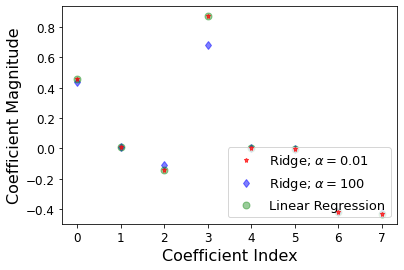

In [7]:

plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()



## 2. Lasso Regression

<br>
<br>
$$Lasso : \lambda \sum_{i=1}^{n} |\theta_i| $$
<br>
<br>
<img src="https://miro.medium.com/max/1400/1*P5Lq5mAi4WAch7oIeiS3WA.png" width=400>
<img src="https://miro.medium.com/max/1400/1*JH9eAS2I9mwOpuFLg-gD6g.png" width=300>

Lasso é outra variação de regularização, em que a função acima é minimizada. É claro que essa variação difere da regressão de Ridge apenas em penalizar os altos coeficientes. Ele usa | $\theta_i$ | (módulo) em vez de quadrados de $\theta_i$, como sua penalidade. Nas estatísticas, isso é conhecido como a norma L1.

Vamos dar uma olhada nos métodos acima com uma perspectiva diferente: a regressão de Ridge pode ser pensada como resolvendo uma equação, onde a soma dos quadrados dos coeficientes é menor ou igual a s. E o Lasso pode ser pensado como uma equação onde a soma do módulo de coeficientes é menor ou igual a s. Aqui, s é uma constante que existe para cada valor do fator de encolhimento λ. Essas equações também são chamadas de funções de restrição.

Considere os seus dois parâmetros em um determinado problema. Então, de acordo com a formulação acima, a regressão de Ridge é expressa por $\theta_1^2 +  \theta_2^2 ≤ c$. Isto implica que os coeficientes de regressão de Ridge têm a menor RSS (função de perda) para todos os pontos que se encontram dentro da circunferência dada por $\theta_1^2 +  \theta_2^2 ≤ c$.

Da mesma forma, para Lasso, a equação se torna $ |\theta_1| +  |\theta_2| ≤ t $. Isto implica que os coeficientes de Lasso possuem o menor RSS (função de perda) para todos os pontos que estão dentro do diamante dado por $ |\theta_1| +  |\theta_2| ≤ t $.

<br>
<img src="https://miro.medium.com/max/1400/1*Jd03Hyt2bpEv1r7UijLlpg.png" style="height:350px">
<br>

A imagem acima mostra as funções de restrição (áreas verdes), para Lasso (esquerda) e regressão de Ridge (direita), juntamente com contornos para RSS (elipse vermelha). Pontos na elipse compartilham o valor do RSS. Para um valor muito grande de s, as regiões verdes conterão o centro da elipse, fazendo estimativas de coeficiente de ambas as técnicas de regressão, iguais às estimativas de mínimos quadrados. Mas, este não é o caso na imagem acima. Nesse caso, as estimativas do coeficiente de regressão de Lasso e Ridge são fornecidas pelo primeiro ponto em que uma elipse entra em contato com a região de restrição. Como a regressão de Ridge possui uma restrição circular sem pontos agudos, essa interseção geralmente não ocorre em um eixo e, portanto, as estimativas do coeficiente de regressão de Ridge serão exclusivamente diferentes de zero. No entanto, a restrição de Lasso tem cantos em cada um dos eixos e, portanto, a elipse geralmente cruza a região de restrição em um eixo. Quando isso ocorre, um dos coeficientes será igual a zero. Em dimensões mais altas (onde os parâmetros são muito maiores que 2), muitas das estimativas de coeficiente podem ser iguais a zero simultaneamente.

Isso esclarece a desvantagem óbvia da regressão de Ridge, que é a interpretabilidade do modelo. Reduzirá os coeficientes dos preditores menos importantes, muito próximos de zero. Mas isso nunca os tornará exatamente zero. Em outras palavras, o modelo final incluirá todos os preditores. No entanto, no caso do Lasso, a penalidade de L1 tem o efeito de forçar algumas das estimativas de coeficiente a serem exatamente iguais a zero quando o parâmetro de ajuste λ é suficientemente grande. Portanto, o método do Lasso também realiza seleção de variáveis ​​e é dito que produz modelos escassos.

## 3. ElasticNet Regression (L1 + L2)

A regressão ElasticNet combina o poder da regressão Ridge e Lasso em um algoritmo. O que isso significa é que, com a ElasticNet, o algoritmo pode remover variáveis fracas como no Lasso ou reduzi-las a quase zero como no Ridge. Todos esses algoritmos são exemplos de Regularização.

Para ler mais acesse o artigo [Elastic Net Regression in Python](https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net)

-------------

## Trade-off entre viés e variância

O modelo de regressão linear simples, no qual você pretende predizer n observações da variável de resposta, Y, com uma combinação linear de m variáveis preditoras, X e um termo de erro normalmente distribuído com variação σ2, é definido por uma equação linear. Como não conhecemos os parâmetros verdadeiros, temos que estimar esses parâmetros a partir da amostra. Na abordagem de mínimos quadrados ordinários (OLS), estimamos-os como β estimados de tal maneira que a soma dos quadrados dos resíduos é a menor possível. 



Para ler mais acesse o artigo [Regularization: Ridge, Lasso and Elastic Net](https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net)

## O que a Regularização faz exatamente?

Um modelo padrão de mínimos quadrados tende a apresentar alguma variação, ou seja, esse modelo não generaliza bem para um conjunto de dados diferente dos dados de treinamento. **A regularização reduz significativamente a variância do modelo, sem aumento substancial de seu viés.** Portanto, o parâmetro de ajuste λ, usado nas técnicas de regularização descritas acima, controla o impacto na variação. À medida que o valor de λ aumenta, reduz o valor dos coeficientes e, assim, reduz a variação. Até certo ponto, esse aumento em λ é benéfico, pois reduz apenas a variação (evitando, portanto, o ajuste excessivo), sem perder propriedades importantes nos dados. Mas, após um certo valor, o modelo começa a perder propriedades importantes, dando origem a um viés no modelo e, portanto, a um ajuste insuficiente. Portanto, o valor de λ deve ser cuidadosamente selecionado.

É tudo o que você precisa para começar a regularizar. É uma técnica útil que pode ajudar a melhorar a precisão dos seus modelos de regressão. Uma biblioteca popular para implementar esses algoritmos é o Scikit-Learn. Ele tem uma API maravilhosa que pode fazer seu modelo funcionar com apenas algumas linhas de código em python.

Artigo original [Regularization in Machine Learning](https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a)


___________________

# Um pouco de Prática

O desemprego é uma grande preocupação socioeconômica e política para qualquer país e, portanto, gerenciá-lo é a principal tarefa de qualquer governo. Nesta prática, tentaremos construir algoritmos de regressão para prever o desemprego em uma economia.

Vamos definir o Passo a Passo

- Carregar as bibliotecas, módulos, classes e funções
- Carregar os dados
- Definir os preditores e a variável resposta
- Criar os conjuntos de treino e teste
- Construir os modelos de regressão, prever e avaliar os resultados

In [8]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [10]:
df= pd.read_csv('unemployment_data.csv')
print(df.shape)
df.describe()

(574, 6)


,Unnamed: 0,pce,pop,psavert,uempmed,unemploy
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,287.500000,4820.092683,257159.652662,8.567247,8.608711,7771.310105
std,165.843802,3556.803613,36682.398508,2.964179,4.106645,2641.959180
min,1.000000,506.700000,198712.000000,2.200000,4.000000,2685.000000
25%,144.250000,1578.300000,224896.000000,6.400000,6.000000,6284.000000
50%,287.500000,3936.850000,253060.000000,8.400000,7.500000,7494.000000
75%,430.750000,7626.325000,290290.750000,11.100000,9.100000,8685.500000
max,574.000000,12193.800000,320402.295000,17.300000,25.200000,15352.000000


In [11]:
df.drop('Unnamed: 0' , axis=1,inplace =True)

In [13]:
target = ['unemploy']
predictors = list(set(list(df.columns))-set(target))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,pce,pop,psavert,uempmed,unemploy
count,574.000000,574.000000,574.000000,574.000000,574.000000
mean,0.395290,0.802615,0.495217,0.341616,7771.310105
std,0.291690,0.114489,0.171340,0.162962,2641.959180
min,0.041554,0.620195,0.127168,0.158730,2685.000000
25%,0.129435,0.701918,0.369942,0.238095,6284.000000
50%,0.322857,0.789820,0.485549,0.297619,7494.000000
75%,0.625426,0.906020,0.641618,0.361111,8685.500000
max,1.000000,1.000000,1.000000,1.000000,15352.000000


In [15]:
#Criar os conjuntos de treino e teste
X = df[predictors].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(401, 4)
(173, 4)


In [16]:
# Regressão linear
lr = LinearRegression()
lr.fit(X_train, y_train)

# Avaliação Regressão Linear
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

986.4203778792611
0.8643441807823631
1044.7751718256557
0.831615696708742


In [17]:
# Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

990.8064876879897
0.8631351138028003
1040.3512413393082
0.8330386695177573


In [18]:
# Lasso Regression
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

986.4208828058871
0.8643440419039413
1044.6822216393111
0.8316456565633901


In [19]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

1353.5137565331572
0.7445889364059675
1380.6610280090797
0.7059439969407901
